### tests :

We would like to know why the algorithm calculates a lot of states near the intermediary states. 

Ideas: 
   - plot the fidelity towards the intermediary state. We will have 3 plots in the case where we have 
    3 intermediary states.
    
   - plot $\lambda$ vs time

In this notebook, we are searching a usecase for intermediary states. This mean that we would like to find a trajectory with intermediary states that follows the geodesic in a better way than a continuos trajectory

## Setup 3 with Python code

Without and with intermediary states.
At the end, one will find the plots comparing both results.

In [1]:
# libraries
import numpy as np
import matplotlib as mpl
from matplotlib import cm
#from sympy.solvers import solve
#from sympy import Symbol
#
#from scipy.optimize import minimize
#from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import qutip

#import mayavi

from contrlWithGeodesics import geodesic

from contrlWithGeodesics import fidelity
from contrlWithGeodesics.pauli_mat_vec import *
from contrlWithGeodesics.utils import delete_less_than_k
from contrlWithGeodesics.controlSetup3 import control1setup3,control1setup3_int_states
from contrlWithGeodesics.getTimeFidelity import get_time_fidelity
#

Control activated and ready to use


In [2]:
## this cell is to have nice plots
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# test
vect1= np.array([0.0,0.0,0.9])
vect2= np.array([0.9,0.0,0.0])
geodesic(0.5,vect1,vect2)

array([[0.79169168+0.j, 0.29169168+0.j],
       [0.29169168+0.j, 0.20830832+0.j]])

In [4]:
# Test values
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.7, 0.8, 0.8])
qssf = 1/np.sqrt(3)*np.array([0.2, 0.9, 0.0])
w0 = 5.0
gamma_0 = 0.01
gamma_c = 10
Nmax = 40
imax = 7
deltat = 0.0030

# Save initial and final states
auxri = qsri
auxsf = qssf

In [5]:
## testing cell
estadoslist, tiempolists, solution, vec_lambda = control1setup3(qsri,qssf,Nmax=Nmax,deltat=deltat)
tiempolists
#vec_lam
vec_lambda
estadoslist
solution

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-03]
        y: [[ 1.175e-01  1.175e-01]
            [ 5.831e-01  5.778e-01]
            [ 1.252e-02  1.136e-02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f091b9fde50>
 t_events: None
 y_events: None
     nfev: 8
     njev: 0
      nlu: 0

In [6]:
## testing cell

finalestados, finaltiempotot, list_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
###
# take account that the bigger imax the better the fidelity. But the improvement in the fidelity 
# is very small



Find time with fidelity
new time: 0.018047968327896163
Fidelity 0.9996280767710948
New quantum state [0.11727109 0.55114972 0.00840203]
Find time with fidelity
new time: 0.0016597737001460106
Fidelity 0.9996814785020094
New quantum state [ 1.16570695e-01  5.49611327e-01 -2.75592779e-04]
Find time with fidelity
new time: 0.0005512211535933214
Fidelity 0.9997035681662392
New quantum state [0.11583265 0.54833099 0.004832  ]
Find time with fidelity
new time: 0.0059727674612250125
Fidelity 0.9998633758128281
New quantum state [0.12042672 0.5370892  0.00889553]
Find time with fidelity
new time: 0.00031930693308050977
Fidelity 0.9998752930139858
New quantum state [0.11832551 0.53759822 0.00546646]
Find time with fidelity
new time: 0.00040214755225599224
Fidelity 0.999883719487303
New quantum state [0.11693966 0.53762968 0.00233403]
Find time with fidelity
new time: 0.0012789775458270198
Fidelity 0.9999056626468097
New quantum state [0.11562314 0.53511377 0.00647526]


In [7]:
list(finalestados[30])[1]

0.6332557466474459

In [8]:
list_lambda_time

[3550.56786842439,
 2946.82610890936,
 3860.01516112416,
 4120.04048576966,
 6498.11418171858,
 6779.76826883387,
 5181.75109690169]

In [9]:
# radius
radius = [np.sqrt((finalestados[i][0])**2+(finalestados[i][1])**2+(finalestados[i][2])**2) for i in range(len(finalestados))]
listfidelities=[fidelity(finalestados[i],qssf) for i in range(len(finalestados))]

In [10]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,50],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(finalestados)):
    b.add_points(finalestados[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,qsri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,50],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.

    newbloch.add_points(vectorgeo[i],'s')

In [11]:
#Mayavi is not working
#b3d = qutip.Bloch3d()
#b3d.show()



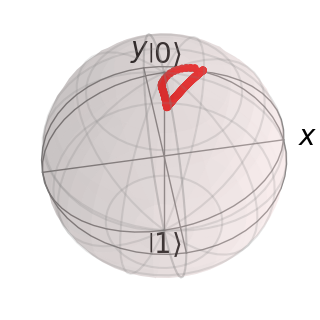

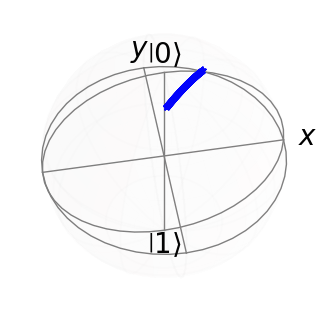

In [12]:
#improve plots

b.show()
newbloch.show()

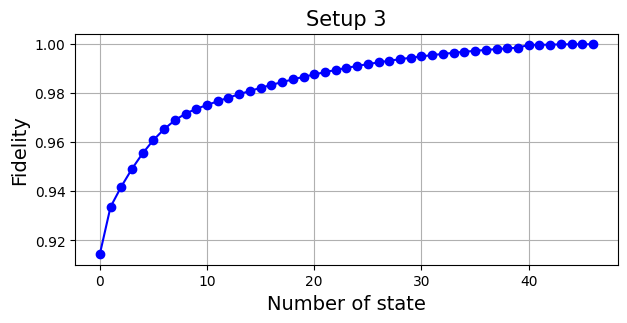

In [13]:
# data
xaxis = [i for i in range(len(finalestados))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelities, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

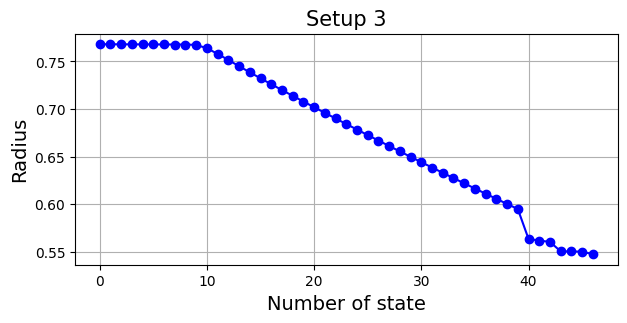

In [14]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radius , '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

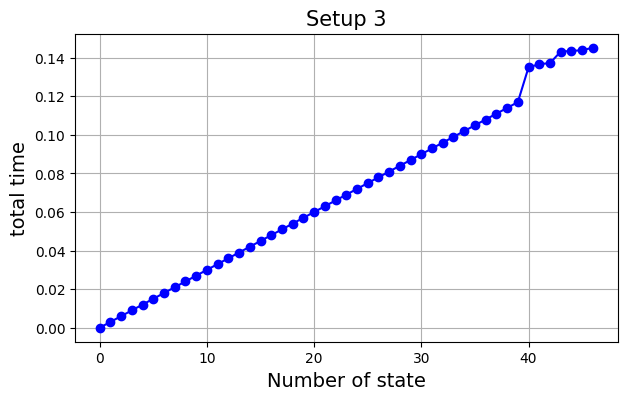

In [15]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,finaltiempotot, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)

# show the plot
plt.show()

In [16]:
print(list_lambda_time[0:5])
print(vec_lambda[0:10])
len(list_lambda_time)

[3550.56786842439, 2946.82610890936, 3860.01516112416, 4120.04048576966, 6498.11418171858]
[61.2742005627058, 66.1754754389770, 72.2489523163035, 79.9079104001009, 89.7922670200548, 102.939219395469, 121.118307692969, 147.492623432852, 187.666770093428, 248.164669292313]


7

ValueError: x and y must have same first dimension, but have shapes (47,) and (48,)

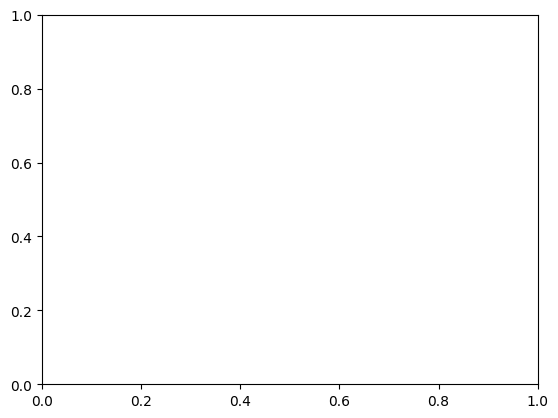

In [17]:
list_lambda =  vec_lambda+list_lambda_time
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

## Testing with intermediary states

In the following cells we are going to use the geodesic that will give us some intermediary states in order to improve the control methodology

In [18]:
# Test values
#del(estadoslist, tiempolists, solution)
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.7, 0.8, 0.8])
qssf = 1/np.sqrt(3)*np.array([0.2, 0.9, 0.0])
w0 = 5

gamma_0 = 0.01
gamma_c = 10
Nmax = 30 ### with 20 is not working
imax = 7
deltat = 0.003

# Save initial and final states
auxri = qsri
auxsf = qssf

In [19]:
#numinter = 4 #number of intermediary states

numinter = 5 #number of intermediary states

#get the intermediary states from the geodesic
intermediaryqs=[geodesic((i)/(numinter-1),qsri,qssf) for i in range(numinter)]
intermediary = [bloch_vector(intermediaryqs[i]) for i in range(len(intermediaryqs)) ]
k = 1.0e-6
for i in range(numinter):
    delete_less_than_k(intermediary[i],k)

In [20]:
intermediary

[array([0.40414519+0.j, 0.46188022+0.j, 0.46188022+0.j]),
 array([0.34168337+0.j, 0.49297194+0.j, 0.3556096 +0.j]),
 array([0.27170149+0.j, 0.51321392+0.j, 0.24151243+0.j]),
 array([0.19573977+0.j, 0.52216066+0.j, 0.12209985+0.j]),
 array([0.11547005+0.j, 0.51961524+0.j, 0.        +0.j])]

In [21]:
solestes =[]
soltimes=[]
auxtime = 0.0
list_lambda = list([])
for i in range(numinter-1):
#for i in range(3):
    #print("run",i)
    estadoslist, tiempolists, solution, lambdavec = control1setup3_int_states(qsri,intermediary[i+1],Nmax=Nmax,initime=auxtime)
    #print(estadoslist)
    solestes=solestes+estadoslist
    soltimes=soltimes+tiempolists
    qsri=estadoslist[-1]
    #print(tiempolists[-1])
    auxtime=tiempolists[-1]
    list_lambda=list_lambda+lambdavec

k 0
0.0020424559568428258
k 1
0.0006645118721610999
k 2
2.249341318671938e-05
k 0
0.002053685469913913
k 1
0.0007680757166573793
k 2
1.9914527621733846e-05
k 3
0.00010899802397767999
k 4
0.00013449821288946673
k 5
5.9635497188459397e-05
k 6
0.0001061384373907126
k 7
8.523406702198866e-05
k 8
9.452653406305522e-05
k 9
7.255132072536696e-05
k 10
0.00010660694368480605
k 11
6.560239877395624e-05
k 12
9.951326317803044e-05
k 13
6.592435503194327e-05
k 14
9.792913241091217e-05
k 15
6.0375482964003524e-05
k 16
9.835641524424954e-05
k 17
5.69411004479603e-05
k 18
9.580473718595606e-05
k 19
5.4268977106808336e-05
k 20
9.464614740206656e-05
k 21
5.0758319170340904e-05
k 22
9.353955057123109e-05
k 23
4.7902332445448614e-05
k 24
9.196920656973084e-05
k 25
4.519118419521462e-05
k 26
9.073889751587405e-05
k 27
4.245309460049196e-05
k 28
8.94719990832682e-05
k 29
3.996810978945664e-05
k 0
0.002881092007690822
k 1
0.0018461676134884364
k 2
0.0009367440577568997
k 3
0.000597556009711453
k 4
0.00062568

In [22]:
list_lambda[0:10]

[241.731866935490,
 446.643406789588,
 1299.16531679228,
 1607.99092309703,
 247.994811070802,
 449.466401405568,
 1343.20014744079,
 889.053770434767,
 1036.55610254568,
 1132.13020750324]

## Using the $i_{max}$ loop and intermediary states

In [23]:
estadoslist=solestes ## reuse the varaible 
tiempolists = soltimes ## reuse the variable
solestes, soltimes, vec_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
list_lambda = list_lambda + vec_lambda_time

Find time with fidelity
new time: 0.000603282760894626
Fidelity 0.9996532107903231
New quantum state [ 0.11416345  0.55099681 -0.00212618]
Find time with fidelity
new time: 0.000584328581452708
Fidelity 0.999681181805028
New quantum state [0.11390442 0.54961158 0.00372714]
Find time with fidelity
new time: 0.0022949064196345985
Fidelity 0.9997503046131155
New quantum state [0.11791235 0.54460906 0.01017863]
Find time with fidelity
new time: 0.00042547016522335865
Fidelity 0.9997658256601185
New quantum state [0.11693285 0.54488128 0.00563622]
Find time with fidelity
new time: 0.0034175189251538004
Fidelity 0.9998476900495152
New quantum state [ 0.11610928  0.54018805 -0.00382731]
Find time with fidelity
new time: 0.0003347762790356641
Fidelity 0.9998617255959872
New quantum state [1.15245461e-01 5.39522759e-01 3.29313319e-04]
Find time with fidelity
new time: 0.0004507101336059022
Fidelity 0.9998724798546919
New quantum state [0.1152762  0.53845318 0.00387939]


In [24]:
list_lambda

[241.731866935490,
 446.643406789588,
 1299.16531679228,
 1607.99092309703,
 247.994811070802,
 449.466401405568,
 1343.20014744079,
 889.053770434767,
 1036.55610254568,
 1132.13020750324,
 1050.96076700159,
 1045.55864534659,
 1095.02903883870,
 1043.93442905271,
 1065.81512714192,
 1080.73452945266,
 1074.71118224839,
 1072.50431458763,
 1080.22728460876,
 1081.62201986000,
 1076.99580062483,
 1092.51855619012,
 1080.62294492295,
 1096.50145565300,
 1082.40096219930,
 1104.20901479020,
 1083.19886809521,
 1111.29935113700,
 1085.28370110049,
 1117.19202883724,
 1086.80584371639,
 1123.78297490443,
 1088.26229425889,
 1129.96557037617,
 1089.96164837262,
 182.305429045249,
 256.424835691008,
 419.126440564741,
 719.472411822233,
 691.995111840865,
 747.555788146859,
 768.171653097360,
 804.150645125091,
 831.873747284354,
 865.857449794001,
 897.517596350140,
 933.079695781328,
 968.056560385094,
 1006.26940196306,
 1044.50055700885,
 1085.98221628314,
 1127.58273278881,
 1172.949261

In [25]:
### for plots using intermediary states

# radius and fidelities
radiusint = [np.sqrt((solestes[i][0])**2+(solestes[i][1])**2+(solestes[i][2])**2) for i in range(len(solestes))]
listfidelitiesint=[fidelity(solestes[i],qssf) for i in range(len(solestes))]

In [26]:
### fidelity using intermediary states

fide_inter_1 = [fidelity(solestes[i],intermediary[1]) for i in range(len(solestes))]
fide_inter_2 = [fidelity(solestes[i],intermediary[2]) for i in range(len(solestes))]
fide_inter_3 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]

## Plots using intermediary states and setup 3

In [27]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,10],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(solestes)):
    b.add_points(solestes[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,auxri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
#for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
#    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,30],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    newbloch.add_points(vectorgeo[i],'s')

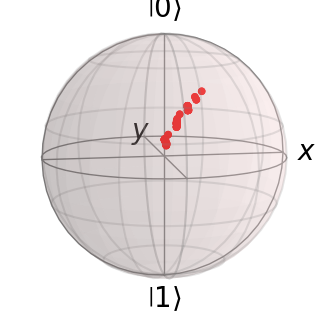

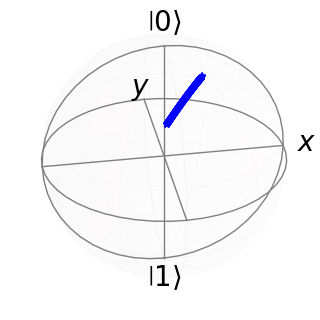

In [28]:
#improve plots
b.show()
newbloch.show()

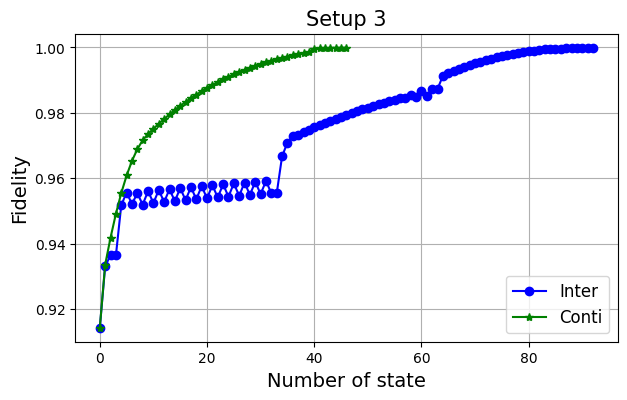

In [29]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelitiesint, '-o', color='blue',label="Inter")

#####################

# data without intermediary states
xaxis1 = [i for i in range(len(finalestados))]
ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

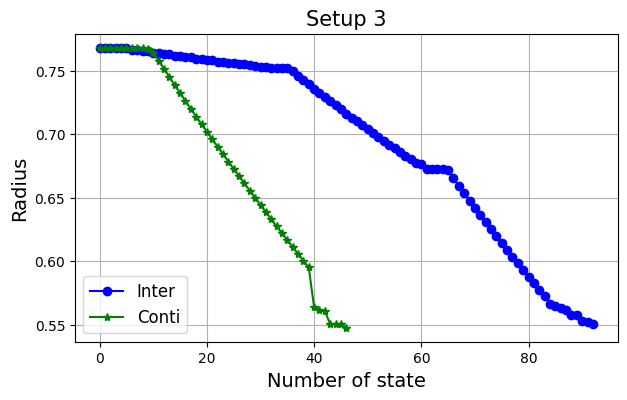

In [30]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radiusint, '-o', color='blue',label="Inter")
ax.plot(xaxis1, radius, '-*', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower left')
# show the plot
plt.show()

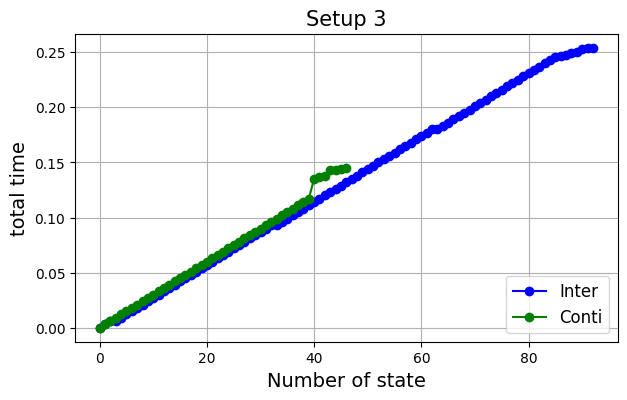

In [31]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,soltimes, '-o', color='blue',label="Inter")
ax.plot(xaxis1,finaltiempotot, '-o', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

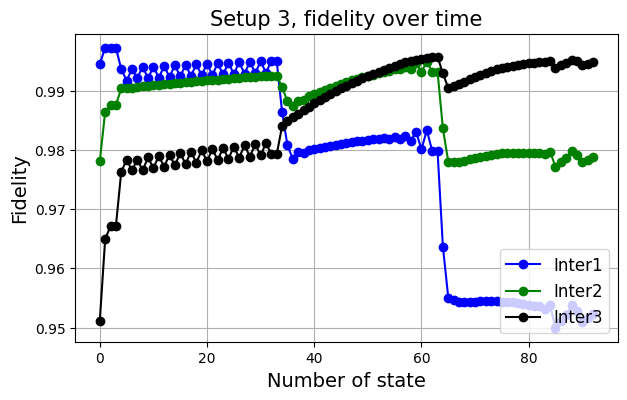

In [32]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, fide_inter_1, '-o', color='blue',label="Inter1")
ax.plot(xaxis, fide_inter_2, '-o', color='green',label="Inter2")
ax.plot(xaxis, fide_inter_3, '-o', color='black',label="Inter3")


#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3, fidelity over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

ValueError: x and y must have same first dimension, but have shapes (93,) and (97,)

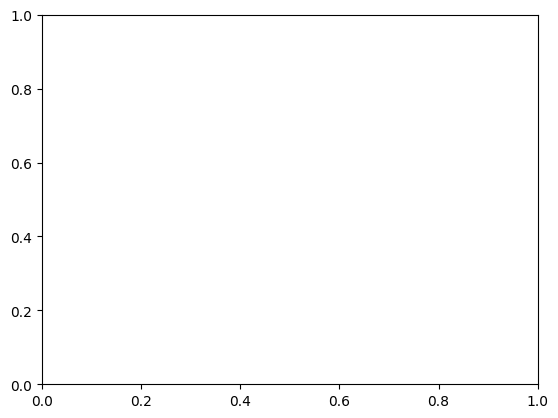

In [33]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda, '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
list_lambda